In [1]:
# Data science helpers
from pathlib import Path
import pandas as pd 
import numpy as np

import featuretools as ft


2024-06-16 22:06:17,156 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "DiversityScore" from "premium_primitives.diversity_score" because a primitive with that name already exists in "nlp_primitives.diversity_score"
2024-06-16 22:06:17,157 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "LSA" from "premium_primitives.lsa" because a primitive with that name already exists in "nlp_primitives.lsa"
2024-06-16 22:06:17,157 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "MeanCharactersPerSentence" from "premium_primitives.mean_characters_per_sentence" because a primitive with that name already exists in "nlp_primitives.mean_characters_per_sentence"
2024-06-16 22:06:17,158 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "NumberOfSentences" from "premium_primi

In [2]:
# Read in all data
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("sample_submission.csv")
df_stores = pd.read_csv("stores.csv")
df_items = pd.read_csv("items.csv")
df_transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
df_oil = pd.read_csv("oil.csv", parse_dates=['date'])
df_holiday = pd.read_csv("holidays_events.csv", parse_dates=['date'])

In [3]:

df_train = pd.read_csv("train.csv",  parse_dates=['date']  )

/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_37934/932450269.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv",  parse_dates=['date']  )


In [4]:
print(df_train.head())

   id       date  store_nbr  item_nbr  unit_sales onpromotion
0   0 2013-01-01         25    103665         7.0         NaN
1   1 2013-01-01         25    105574         1.0         NaN
2   2 2013-01-01         25    105575         2.0         NaN
3   3 2013-01-01         25    108079         1.0         NaN
4   4 2013-01-01         25    108701         1.0         NaN


In [5]:
train_items=df_train.merge(df_items, left_on='item_nbr', right_on='item_nbr',
                 how='left' )
train_items=train_items.merge(df_holiday,left_on='date', right_on='date',
                 how='left' )
train_items=train_items.merge(df_oil,left_on='date', right_on='date',
                 how='left' )

In [6]:
train_items.head()
train_items=train_items.dropna()

In [7]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
all_info=train_items.merge(df_transactions, left_on=['date','store_nbr'], right_on=['date','store_nbr'],                how='left' )

In [9]:
all_info=all_info.merge(df_stores, left_on=['store_nbr'] ,right_on=['store_nbr'],
           how='left' )

In [10]:
all_info['date']=pd.to_datetime(all_info['date'],format= "%d/%m/%Y")

In [11]:
all_info['month']=all_info['date'].dt.month

In [12]:
all_info['year']=all_info['date'].dt.year

In [13]:
all_info['day']=all_info['date'].dt.weekday

In [14]:
all_info.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
transactions    0
city            0
state           0
type_y          0
cluster         0
month           0
year            0
day             0
dtype: int64

In [15]:
dummy_variables = ['onpromotion','type_x','cluster',
                'family','perishable','type_y','onpromotion', 'transferred']

In [16]:
dummies=pd.get_dummies(all_info[dummy_variables],drop_first=True)

In [17]:
all_info_no_dummies = all_info.drop(dummy_variables, axis=1)

In [18]:
df=all_info_no_dummies.merge(dummies,left_index=True,right_index=True)

In [19]:
df.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'class', 'locale',
       'locale_name', 'description', 'dcoilwtico', 'transactions', 'city',
       'state', 'month', 'year', 'day', 'cluster', 'perishable',
       'onpromotion_True', 'type_x_Bridge', 'type_x_Event', 'type_x_Holiday',
       'type_x_Transfer', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_

In [20]:
df = df.loc[:,~df.columns.duplicated()].copy()


In [21]:
df

,id,date,store_nbr,item_nbr,unit_sales,class,locale,locale_name,description,dcoilwtico,...,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_y_B,type_y_C,type_y_D,type_y_E,transferred_True
0,21657651,2014-04-01,1,103520,1.0,1028,Regional,Cotopaxi,Provincializacion de Cotopaxi,99.69,...,False,False,False,False,False,False,False,True,False,False
1,21657652,2014-04-01,1,103665,3.0,2712,Regional,Cotopaxi,Provincializacion de Cotopaxi,99.69,...,False,False,False,False,False,False,False,True,False,False
2,21657653,2014-04-01,1,105574,1.0,1045,Regional,Cotopaxi,Provincializacion de Cotopaxi,99.69,...,False,False,False,False,False,False,False,True,False,False
3,21657654,2014-04-01,1,105575,11.0,1045,Regional,Cotopaxi,Provincializacion de Cotopaxi,99.69,...,False,False,False,False,False,False,False,True,False,False
4,21657655,2014-04-01,1,105577,4.0,1045,Regional,Cotopaxi,Provincializacion de Cotopaxi,99.69,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560595,125497035,2017-08-15,54,2089339,4.0,1006,Local,Riobamba,Fundacion de Riobamba,47.57,...,False,False,False,False,False,False,True,False,False,False
12560596,125497036,2017-08-15,54,2106464,1.0,1148,Local,Riobamba,Fundacion de Riobamba,47.57,...,False,False,False,False,False,False,True,False,False,False
12560597,125497037,2017-08-15,54,2110456,192.0,1120,Local,Riobamba,Fundacion de Riobamba,47.57,...,False,False,False,False,False,False,True,False,False,False
12560598,125497038,2017-08-15,54,2113914,198.0,3040,Local,Riobamba,Fundacion de Riobamba,47.57,...,False,False,False,False,False,False,True,False,False,False


In [22]:
df.select_dtypes(include=float)

,unit_sales,dcoilwtico
0,1.0,99.69
1,3.0,99.69
2,1.0,99.69
3,11.0,99.69
4,4.0,99.69
...,...,...
12560595,4.0,47.57
12560596,1.0,47.57
12560597,192.0,47.57
12560598,198.0,47.57


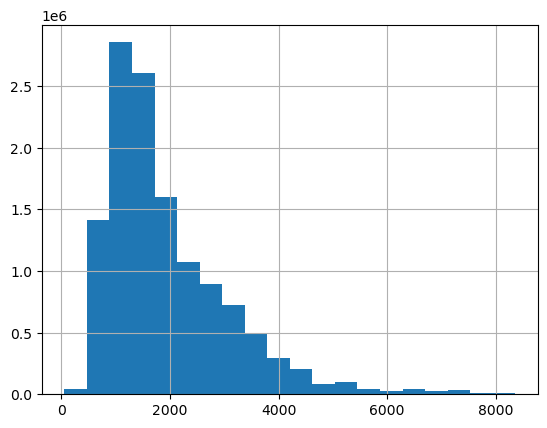

In [23]:
from matplotlib import pyplot as plt
df.transactions.hist(bins=20)
plt.show()

In [24]:

from sklearn.preprocessing import StandardScaler
SS_scaler = StandardScaler()

In [25]:
SS_scaler.fit(df[['transactions']])
df['ss_scaled_transactions']=SS_scaler.transform(df[['transactions']])


<Axes: >

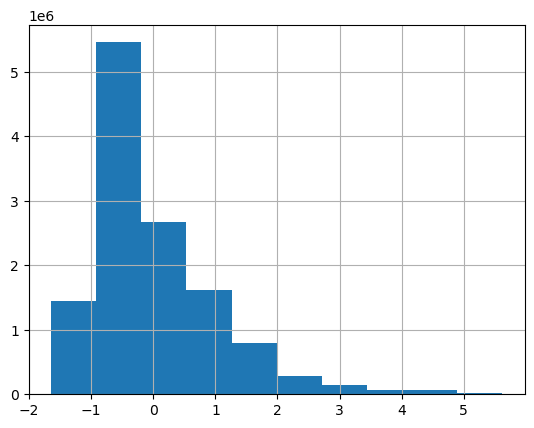

In [26]:
df['ss_scaled_transactions'].hist()

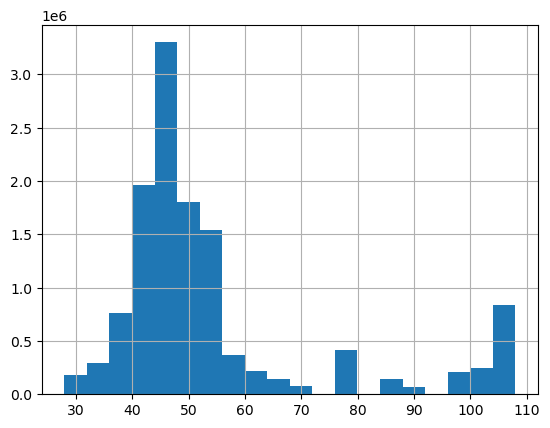

In [27]:
df.dcoilwtico.hist(bins=20)
plt.show()

In [28]:
SS_scaler2 = StandardScaler()
SS_scaler2.fit(df[['dcoilwtico']])
df['ss_scaled_dcoilwtico']=SS_scaler2.transform(df[['dcoilwtico']])


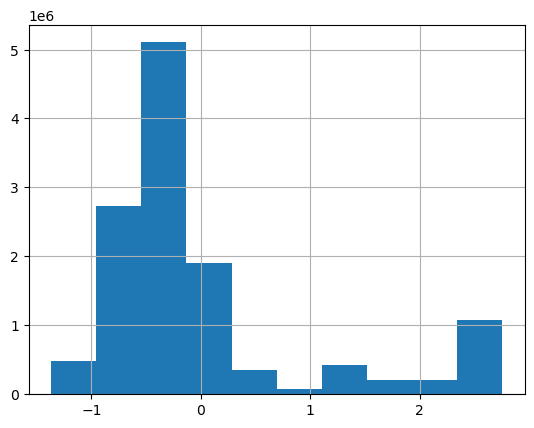

In [29]:
df['ss_scaled_dcoilwtico'].hist()
plt.show()

In [30]:
%store df

Stored 'df' (DataFrame)
